In [1]:
import sys
sys.path.append('path_to_AutoCD')

In [2]:
import jpype
from jpype import *
from jpype.types import *
import jpype.imports
from AutoCD.modules.AFS_module import *
from AutoCD.modules.CL_module import *
from AutoCD.modules.CRV_module_confidence import *
from AutoCD.modules.CRV_module_visualization import *
from AutoCD.modules.CRV_module_causalpaths import *

In [3]:
jpype.startJVM("-ea", classpath=['../jar_files/*'], convertStrings=False)

## Application
Apply AutoCD modules on temporal data

Author: kbiza@csd.uoc.gr

Note : Open Cytoscape before running the script

#### Inputs required from the user

In [4]:
data = pd.read_csv('./toy_data/data_20n_2d_2lags_1000s.csv', index_col=0)
target_name = 'V10'
n_lags = 2

### 1. AFS module

#### Inputs

1. dataset
2. name of the target Y
3. the number of previous time lags

#### Outputs

1. markov boundary of the target, Mb(Y)
2. predictive model for Y=f(Mb(Y))
3. average predictive performance
4. reduced data



In [5]:
mb, model, performance, reduced_data = AFS_module(data, target_name, n_lags=n_lags)

target V10 with optimal config: {'pred_name': 'random_forest', 'min_samples_leaf': 0.01, 'n_estimators': 100, 'max_features': 'sqrt', 'fs_name': 'ses', 'ind_test_name': 'testIndReg', 'alpha': 0.05, 'max_k': 5}


### 2. CL module

#### Inputs

1. reduced data
   
#### Outputs

1. selected causal configuration
2. estimated causal structure (MEC)


In [6]:
causal_config, mec_causal_graph = CL_module(reduced_data)

OCT tuning method
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svarfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  svargfci
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run ca

### 3. CRV module

#### 3.1. Compute edge confidences

#### Inputs

1. reduced data
2. selected causal configuration
3. estimated causal structure (MEC)
4. number of lags

#### Outputs

1. edge confidences

In [7]:
edge_confidences = CRV_module_confidence(reduced_data, causal_config, mec_causal_graph, n_lags=n_lags)

	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discovery with  LPCMCI
	run causal discover

### 3. CRV module

#### 3.2 Visualize the causal graph

#### Inputs

1. causal graph 
2. name of the graph
3. name of the target
4. edge confidences
5. type of weights to control the width of the edges (e.g. edge consistency)
6. number of lags
   
#### Outputs

1. Cytoscape network id

You are connected to Cytoscape!
Applying default style...
Applying preferred layout
No edges selected.
No edges selected.
No edges selected.


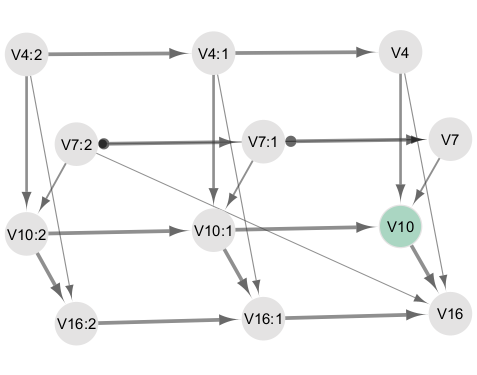

In [8]:
network_id = CRV_module_visualization(mec_causal_graph, 'estimated_graph', target_name,
                         edge_info=edge_confidences, edge_weights='consistency', n_lags=n_lags)

p4c.clear_selection(network= network_id)
p4c.notebook_export_show_image(network= network_id, zoom=60)

### 3. CRV module

#### 3.3. Identify:
1. the causal ancestors and neighbors of the target node
2. the causal paths between a source node and the target node

#### Inputs

1. causal graph 
2. name of source node
3. name of target node
4. Cytoscape network id

#### Ouputs

1. the id of the identified causal paths

In [9]:
source_name = 'V7:2'

In [10]:
paths = CRV_module_causalpaths(mec_causal_graph, source_name, target_name, network_id)
print(paths)

Neighbors of the target
	V4 ---> V10
	V7 ---> V10
	V16 <--- V10
	V10:1 ---> V10
{'potentially_directed': 2652, 'directed': 2738, 'any_type': 2830}


##### Show the identified causal ancestors and neighbors

- causal ancestors with green
- neighbors with yellow

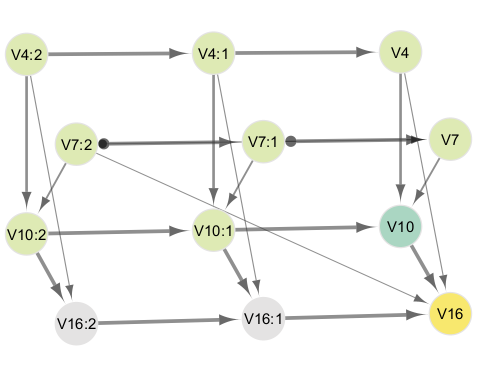

In [11]:
p4c.notebook_export_show_image(network=network_id, zoom=60)

##### Show the identified causal paths

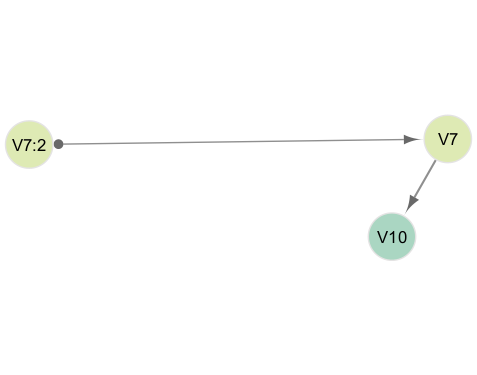

In [12]:
p4c.notebook_export_show_image(network=paths['potentially_directed'], zoom=60)

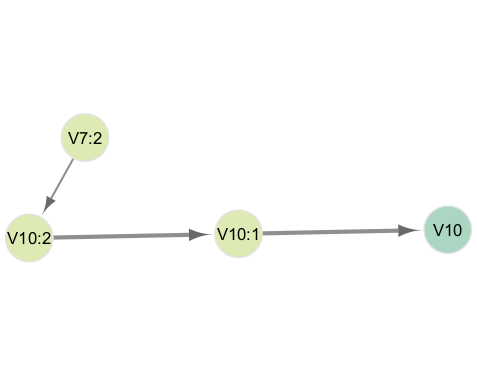

In [13]:
p4c.notebook_export_show_image(network=paths['directed'], zoom=60)

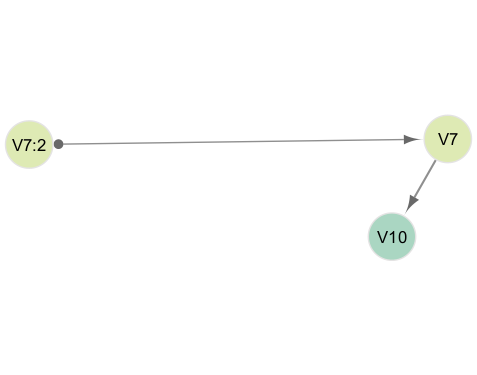

In [14]:
p4c.notebook_export_show_image(network=paths['any_type'], zoom=60)

##### Examples with other source nodes

In [15]:
paths = CRV_module_causalpaths(mec_causal_graph, 'V16:2', target_name, network_id)

Neighbors of the target
	V4 ---> V10
	V7 ---> V10
	V16 <--- V10
	V10:1 ---> V10


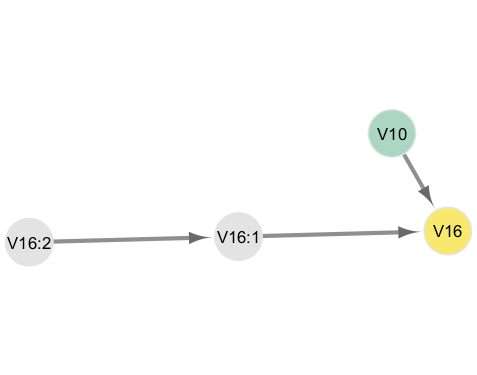

In [16]:
p4c.notebook_export_show_image(network=paths['any_type'], zoom=60)